<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Q1" data-toc-modified-id="Q1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Q1</a></span></li><li><span><a href="#Q2" data-toc-modified-id="Q2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Q2</a></span></li><li><span><a href="#Q3" data-toc-modified-id="Q3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Q3</a></span></li><li><span><a href="#Q4" data-toc-modified-id="Q4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Q4</a></span></li></ul></div>

# Q1

In [1]:
from collections import deque
from bs4 import BeautifulSoup
import sys
import urllib
from html.parser import HTMLParser
from urllib.request import urlopen
from urllib import parse
import re

In [2]:
url = "https://en.wikipedia.org/wiki/Web_mining"
urlf = urlopen(url)
soup = BeautifulSoup(urlf.read(),"lxml")
with open("doc1.txt","w+") as f:
    for a in soup.find_all('p'):
        #print(a.getText())
        f.write(a.getText()+"\n")

In [3]:
url = "https://en.wikipedia.org/wiki/Data_mining"
urlf = urlopen(url)
soup = BeautifulSoup(urlf.read(),"lxml")
with open("doc2.txt","w+") as f:
    for a in soup.find_all('p'):
        #print(a.getText())
        f.write(a.getText()+"\n")

In [4]:
url = "https://en.wikipedia.org/wiki/Artificial_intelligence"
urlf = urlopen(url)
soup = BeautifulSoup(urlf.read(),"lxml")
with open("doc3.txt","w+",encoding="utf-8") as f:
    for a in soup.find_all('p'):
        #print(a.getText())
        f.write(a.getText()+"\n")

In [5]:
url = "https://en.wikipedia.org/wiki/Machine_learning"
urlf = urlopen(url)
soup = BeautifulSoup(urlf.read(),"lxml")
with open("doc4.txt","w+",encoding="utf-8") as f:
    for a in soup.find_all('p'):
        #print(a.getText())
        f.write(a.getText()+"\n")

In [6]:
url = "https://en.wikipedia.org/wiki/Mining"
urlf = urlopen(url)
soup = BeautifulSoup(urlf.read(),"lxml")
with open("doc5.txt","w+",encoding="utf-8") as f:
    for a in soup.find_all('p'):
        #print(a.getText())
        f.write(a.getText()+"\n")

In [10]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [15]:
f1 = open("doc1.txt","r").read()
f2 = open("doc2.txt","r").read()
f3 = open("doc3.txt","r",encoding="utf8").read()
f4 = open("doc4.txt","r",encoding="utf8").read()
f5 = open("doc5.txt","r",encoding="utf8").read()
#print(f5)
#print(f2)
rem_stop1 = word_tokenize(f1)
rem_stop2 = word_tokenize(f2)
rem_stop1 = word_tokenize(f3)
rem_stop2 = word_tokenize(f4)
rem_stop1 = word_tokenize(f5)


In [30]:
def computeTF(worddict, bow):
    tfdict={}
    bowcount=len(bow)
    for word, count in worddict.items():
        tfidf[word]=count/float(bowcount)
    return tfdict

In [31]:
import math
def computeIDF(doclist):
    idfdict={}
    n=len(doclist)
    idfdict=dict.fromkeys(doclist[0].keys(),0)
    for doc in doclist:
        for word, val in doc.items():
            if val>0:
                idfdict[word]+=1
    for word,val in idfdict.items():
        idfdict[word]=math.log10(N/float(val))
    return idfdict
    

In [32]:
def computeTFIDF(tfbow,idfs):
    tfidf={}
    for word,val in tfbow.items():
        tfidf[word]=val*idfs[word]
    return tfidf

# Q2

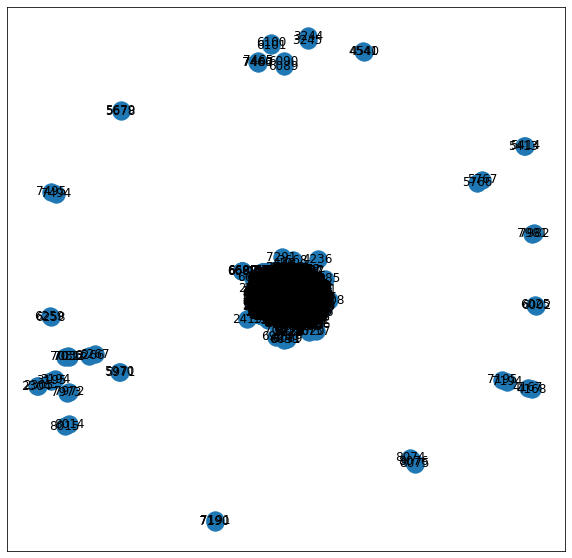

In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as pyplot

data=pd.read_csv("ass3txt.csv")
nodes = data['nodes'].tolist()
edges=data['edges'].tolist()
l=len(edges)
for i in range (0,103689):
    a=(nodes[i],edges[i])
    gr.append(a)
G.add_edges_from(gr)
pyplot.figure(figsize=(10,10))
nx.draw_networkx(G,with_labels=True)


In [7]:
#conda install -c anaconda networkx

# Q3

In [10]:
#calculating page rank of a given graph
import networkx as nx
from numpy import *

G=nx.DiGraph()
G.add_edges_from([('1','2'),('1','3'),('1','4'),('2','4'),('2','5'),('3','6'),('4','3'),('4','6'),('4','7'),('5','4'),('5','7'),('7','6')])
result1 = nx.adjacency_matrix(G)
result=result1.todense()
outlinks=result1.todense()
print(result)

[[0 1 1 1 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 1 1]
 [0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


In [13]:
#Stochastic matrix calculation
stoc = result
sum = [0,0,0,0,0,0,0]
for i in range(7):
    for j in range(7):
        sum[i] += result[i,j]
        
for i in range(7):
    for j in range(7):
        if sum[i] == 0:
            stoc[i,j] = 1/7
        else:
            if stoc[i,j] > 0:
                stoc[i,j] = stoc[i,j]/sum[i]
print("Stochastic matrix is: ")
print(stoc)

Stochastic matrix is: 
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


In [45]:
X=[[0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,1,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,1,0]]
trans=[[0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0]]
for i in range(len(X)):
   # iterate through columns
   for j in range(len(X[0])):
       trans[j][i] = X[i][j]

for r in trans:
   print(r)

print("Transpose is: ")
print(trans)

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0]
Transpose is: 
[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0]]


Order of page rank:
[('1', 0.13681042195546828), ('2', 0.13909059538822005), ('5', 0.14028768627531185), ('3', 0.14152517861068137), ('7', 0.14275219590285904), ('4', 0.14607505043299307), ('6', 0.15345887143446624)]


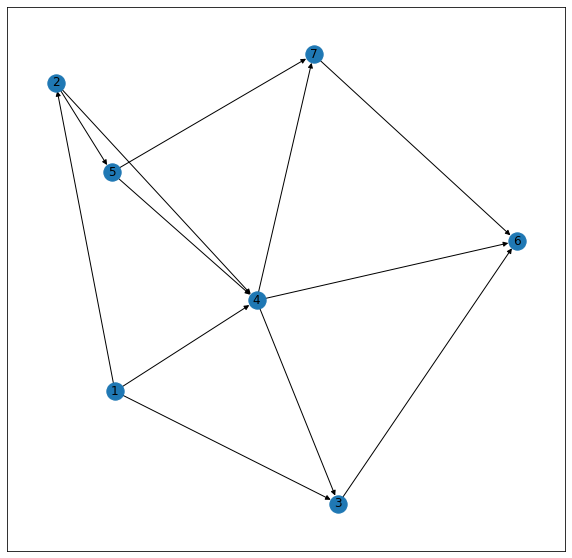

In [33]:
import matplotlib.pyplot as pyplot
def pagerank(G, alpha=0.9, personalization=None,max_iter=100,tol=1.0e-6,nstart=None, weight='weight',dangling=None):
    if len(G)==0:
        return {}
    if not G.is_directed():
        D=G.to_directed()
    else:
        D=G
    W=nx.stochastic_graph(D,weight=weight)
    N=W.number_of_nodes()
    if nstart is None:
        x=dict.fromkeys(W,1.0/N)
    else:
        s=float(sum(nstart.values()))
        x=dict((k,v/s) for k, v in nstart.items())
    if personalization is None:
        p=dict.fromkeys(W,1.0/N)
    else:
        missing=set(G)-set(personalization)
        if missing:
            raise NetworkXError('Personalization dictionary must have vaue for every node. Missing values %s' % missing)
            s=float(sum(personalization.values()))
            p=dict((k,v/s) for k, v in personalization.items())
    if dangling is None:
        dangling_weights=p
    else:
        missing=set(G)-set(dangling)
        if missing:
            raise NetworkXError('Dangling node dictionary must have vaue for every node. Missing values %s' % missing)
            s=float(sum(dangling.values()))
            dangling_weights=dict((k,v/s) for k, v in dangling.items())
    dangling_nodes=[n for n in W if W.out_degree(n,weight=weight)==0.0]
    #power iteration
    for _ in range(max_iter):
        xlast=x
        x=dict.fromkeys(xlast.keys(),0)
        danglesum=alpha*sum(xlast[n] for n in dangling_nodes)
        for n in x:
            for nbr in W[n]:
                x[nbr]+=alpha*xlast[n]*W[n][nbr][weight]
            x[n]+=danglesum*dangling_weights[n]+(1.0-alpha)*p[n]
        err= sum([abs(x[n]-xlast[n] ) for n in x])
        if err<N*tol:
                 return x
    raise NetworkXError('Pagerank: Power Iteration failed to converge in %d iterations' % max_iter)
import networkx as nx
G=nx.DiGraph()
G.add_edges_from([('1','2'),('1','3'),('1','4'),('2','4'),('2','5'),('3','6'),('4','3'),('4','6'),('4','7'),('5','4'),('5','7'),('7','6')])
pyplot.figure(figsize=(10,10))
nx.draw_networkx(G,with_labels=True)
pr=nx.pagerank(G,0.05)
print('Order of page rank:')
print(sorted(pr.items(), key = 
             lambda kv:(kv[1], kv[0])))  
        
    

# Q4

In [53]:
import numpy as np
# Function to calculate the authority and hub score of the nodes
def authority_hub_score(result):
	# size of the matrix
	size = result.shape[0]
	
	# Initializing the lists
	hub_scores = [1.0 for i in range(size)]
	authority_scores = [1.0 for i in range(size)]
	
	# Printing initial Hub scores
	print(hub_scores)
	
	for _ in range(100):
		# Calculating the authority scores of the nodes
		for j in range(size):
			temp_auth = 0.0
			for i in range(size):
				if result[i][j] == 1:
					temp_auth += hub_scores[i]
			authority_scores[j] = temp_auth
			
		# Normalizing the authority scores
		auth_sum = sum(authority_scores)
		# print(auth_sum)
		for i in range(len(authority_scores)):
			authority_scores[i] /= auth_sum
		
		# Calculating the hub scores of the nodes
		for i in range(size):
			temp_hub = 0.0
			for j in range(size):
				if result[i][j] == 1:
					temp_hub += authority_scores[j]
			hub_scores[i] = temp_hub
			
		# Normalizing the hub scores
		hub_sum = sum(hub_scores)
		# print(hub_sum)
		for i in range(len(hub_scores)):
			hub_scores[i] /= hub_sum
	
	return authority_scores, hub_scores
					
G=nx.DiGraph()
G.add_edges_from([('1','2'),('1','3'),('1','4'),('2','4'),('2','5'),('3','6'),('4','3'),('4','6'),('4','7'),('5','4'),('5','7'),('7','6')])
result1 = nx.adjacency_matrix(G)
result=result1.todense()
result = np.reshape(result, (n, n))
print(result)
authority_scores= authority_hub_score(result)
hub_scores = authority_hub_score(result)
print("Authority Scores:")
for i in (authority_scores):
	print(round(i, 4))
print("Hub Scores:")
for i in (hub_scores):
	print(round(i, 4))

[[0 1 1 1 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 1 1]
 [0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Hub Scores:  {'1': 0.2536279578248445, '2': 0.13487935373616322, '3': 0.07819743434645939, '4': 0.2600965489777812, '5': 0.19500127076829243, '6': 0.0, '7': 0.07819743434645939}
Authority Scores:  {'1': 0.0, '2': 0.10759121399691249, '3': 0.2179264616287913, '4': 0.2475294808810441, '5': 0.05721700997448752, '6': 0.1766793289772416, '7': 0.1930565045415229}


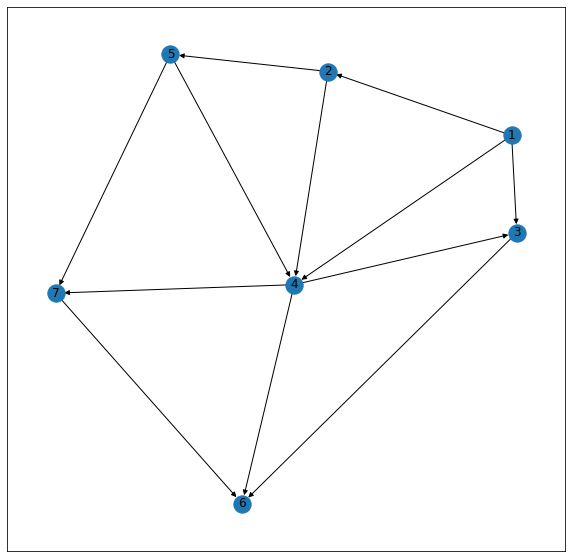

In [55]:
import networkx as nx
import matplotlib.pyplot as pyplot
G=nx.DiGraph()
G.add_edges_from([('1','2'),('1','3'),('1','4'),('2','4'),('2','5'),('3','6'),('4','3'),('4','6'),('4','7'),('5','4'),('5','7'),('7','6')])
pyplot.figure(figsize=(10,10))
nx.draw_networkx(G,with_labels=True)
hubs,authorities=nx.hits(G,max_iter=50,normalized=True)
print('Hub Scores: ',hubs)
print('Authority Scores: ',authorities)